## How to look at MITgcm netCDF output, an example

You need to install MITgcmutils package (https://pypi.org/project/MITgcmutils/)

In [18]:
import cmocean as cmo
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import matplotlib as mpl
import numpy as np
import xarray as xr
import MITgcmutils as MIT
import seaborn as sns

In [19]:
sns.set_context('notebook')
#outdir = '/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run_expand/mnc_0001/'
outdir2 = '/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run_expand/mnc_0002/'
outdir_nobay ='/Volumes/Esteban_SSD/Maestría/MITgcm/verification/BayIW/run_expand_nobay/mnc_0001/'

In [20]:
nc = MIT.mnc_files(outdir2+'state.0000000600.t*.nc')
gr = MIT.mnc_files(outdir2+'grid.t*.nc')
#nc2 = MIT.mnc_files(outdir2+'state.0000000600.t*.nc')
#gr2 = MIT.mnc_files(outdir2+'grid.t*.nc')
#nc_nobay = MIT.mnc_files(outdir_nobay+'state.0000000000.t*.nc')
#gr_nobay = MIT.mnc_files(outdir_nobay+'grid.t*.nc')

ValueError: mmap length is greater than file size

In [ ]:
# Load some grid variables
depth = gr.variables['Depth'][:]
hFacC = gr.variables['HFacC'][:]
XC = gr.variables['XC'][:]
YC = gr.variables['YC'][:]
XG = gr.variables['XG'][:]
YG = gr.variables['YG'][:]
RC = gr.variables['RC'][:]
RL = gr.variables['RL'][:]
mask = np.ma.getmask(np.ma.masked_values(depth, 0))
mask3D = np.ma.getmask(np.ma.masked_values(hFacC[:,:], 0))
time = nc.variables['T'][:102]
timetotal = nc.variables['T'][:]

In [ ]:
nc.variables

In [ ]:
# Plot bathymetry
fig, ax = plt.subplots(1,1)
ax.set_facecolor('tan')
pc = ax.contourf(XC[0,:],np.flip(YC[:,0]),
                np.ma.masked_array(-depth, mask=mask),
                cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, label='depth (m)')


In [9]:
time

array([36000., 37200., 38400., 39600., 40800., 42000., 43200., 44400.,
       45600., 46800., 48000., 49200., 50400., 51600., 52800., 54000.,
       55200., 56400., 57600., 58800., 60000., 61200., 62400., 63600.,
       64800., 66000., 67200., 68400., 69600., 70800., 72000.])

In [10]:
W = nc.variables['W']
W.shape

(31, 40, 320, 272)

In [11]:
RC[25]

-222.39999999999995

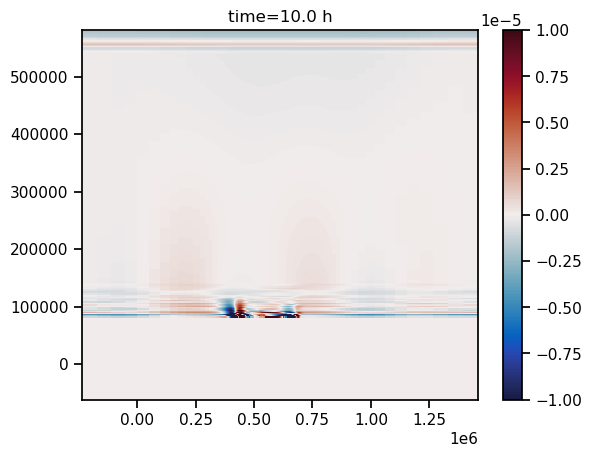

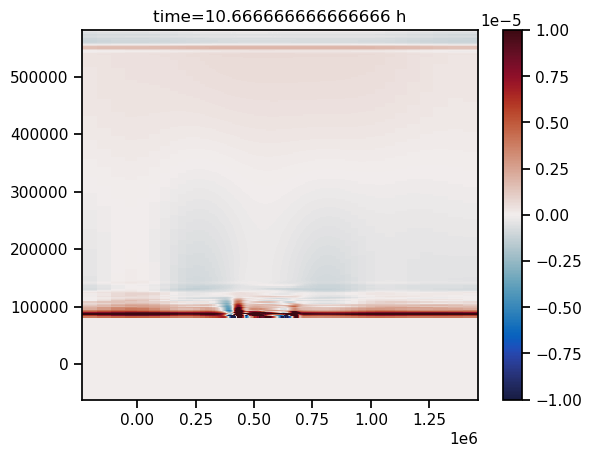

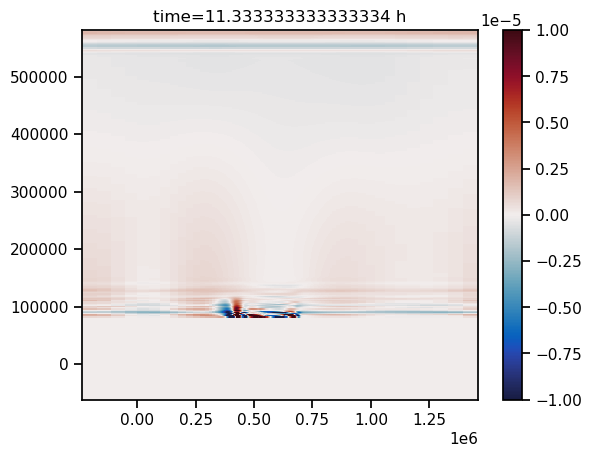

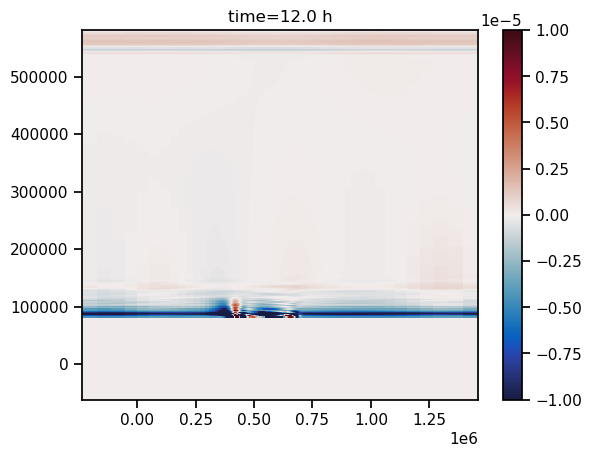

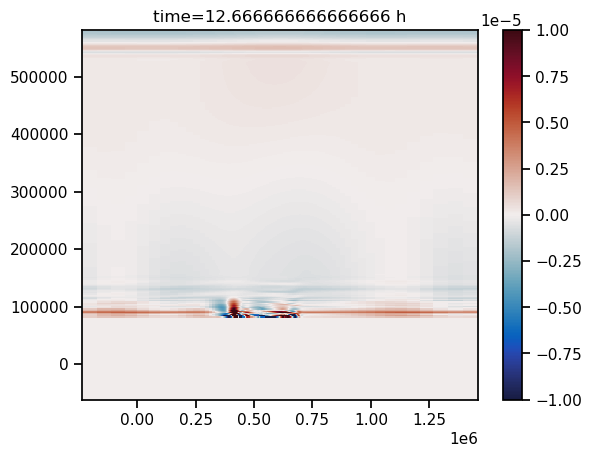

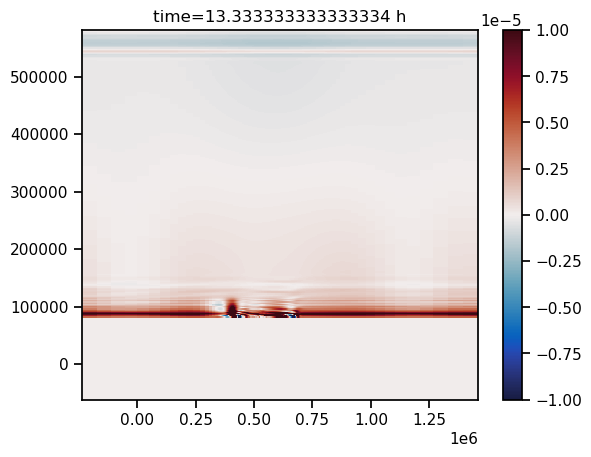

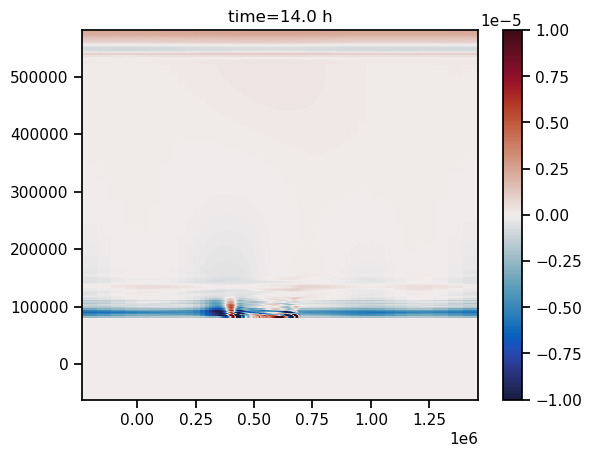

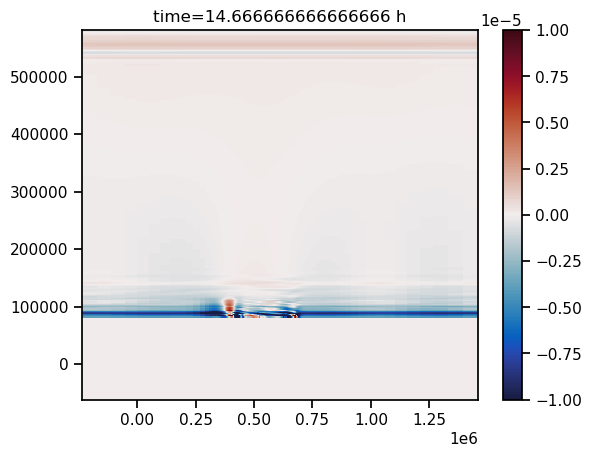

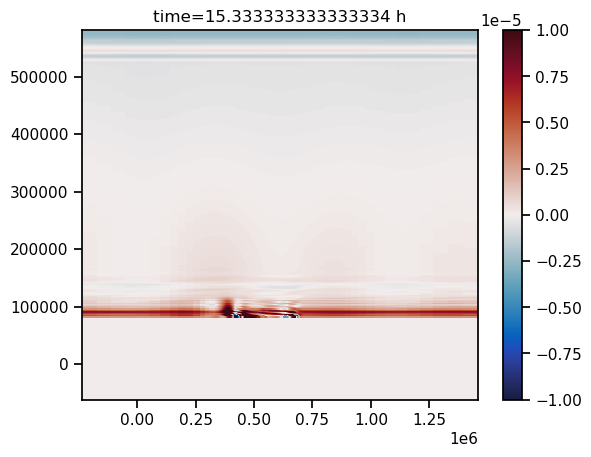

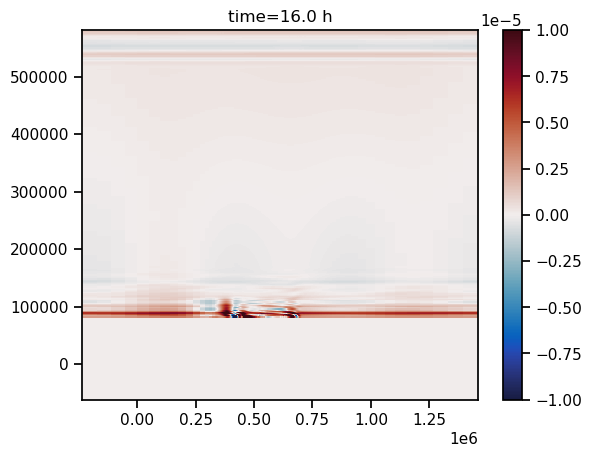

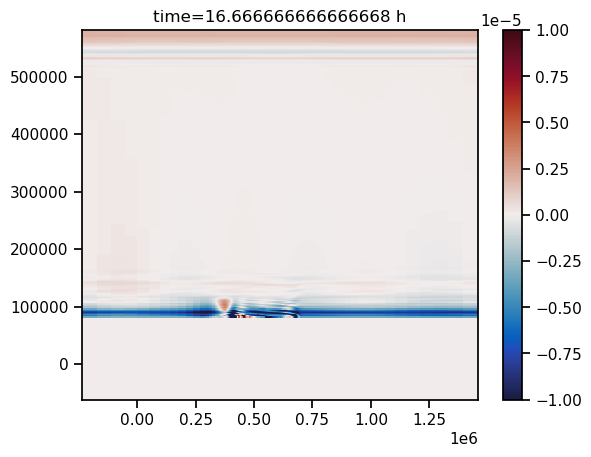

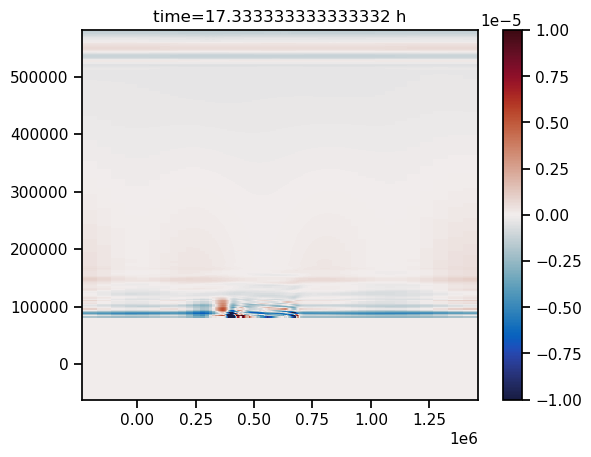

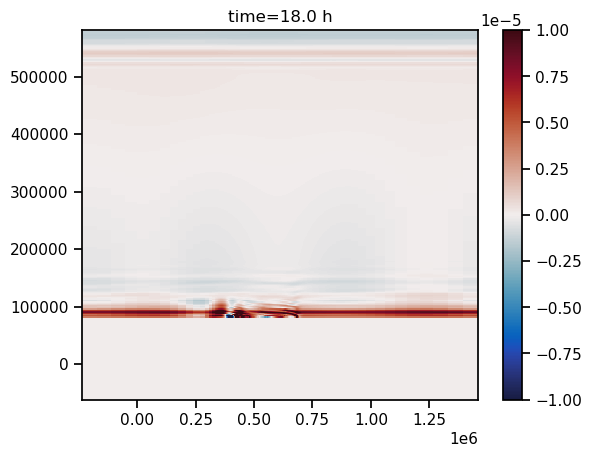

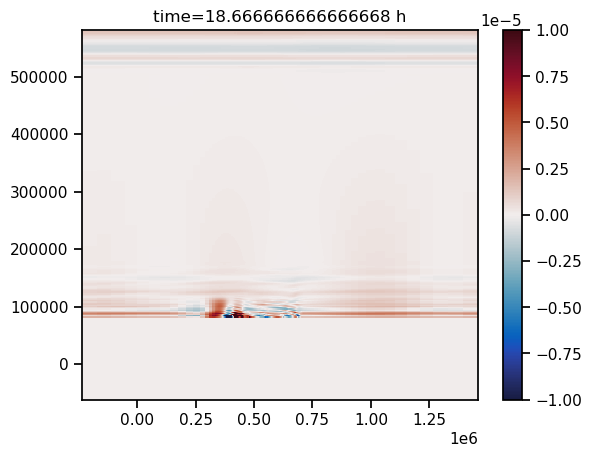

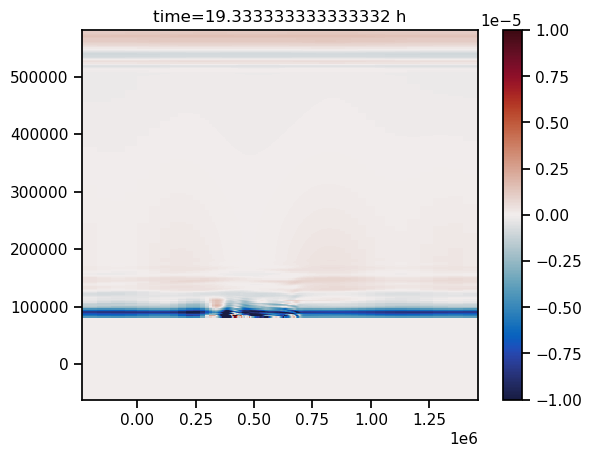

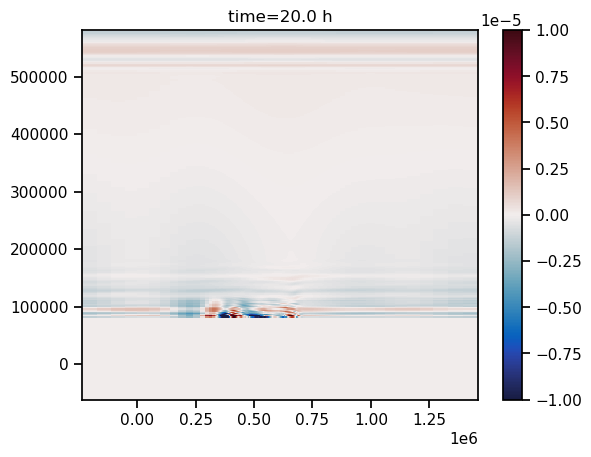

In [12]:
#Velocidad vertical (W) a los 222.40 m de profundidad.
#poner aspect(1)
for tt in range(0,31,2):
    W = nc.variables['W'][tt,25,:,:]
    plt.pcolormesh(XC[0,:],YC[:,0],W,vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
    plt.colorbar()
    plt.title(f'time={time[tt]/3600} h')
    plt.show()

In [13]:
np.shape(W)

(320, 272)

In [14]:
print(XC[0,100])
print(YC[120,0])

507704.6500000012
180133.2


In [15]:
XC.shape
print(XC[0,0])

-205000.0


In [16]:
2*36000

72000

In [17]:
nc.variables['T'][:]

array([36000., 37200., 38400., 39600., 40800., 42000., 43200., 44400.,
       45600., 46800., 48000., 49200., 50400., 51600., 52800., 54000.,
       55200., 56400., 57600., 58800., 60000., 61200., 62400., 63600.,
       64800., 66000., 67200., 68400., 69600., 70800., 72000.])

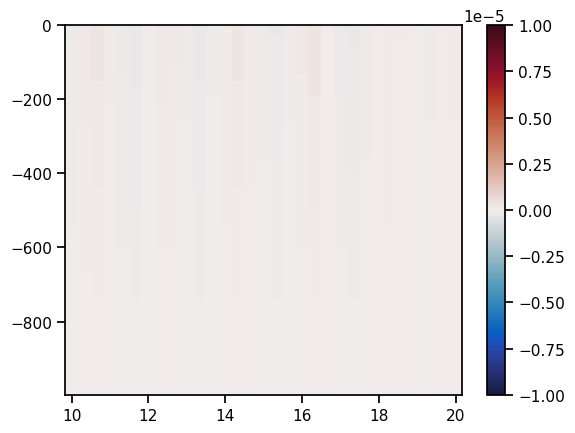

In [18]:
W = nc.variables['W'][:,:,100,120]
plt.pcolormesh(time/3600,RC,np.transpose(W),vmin=-1E-5, vmax=1E-5, cmap=cmo.cm.balance)
plt.colorbar()
plt.title(f'')
plt.show()